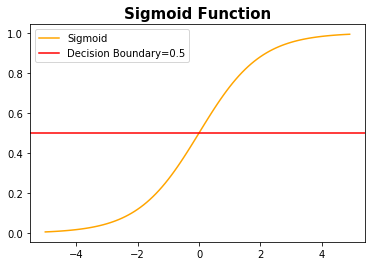

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.1)
y = 1/(1+np.exp(-x))

plt.title('Sigmoid Function', size=15, weight='bold')
plt.plot(x,y,color='orange', label='Sigmoid')
plt.axhline(0.5, color='red', label='Decision Boundary=0.5')
plt.legend(loc='upper left')
plt.show()

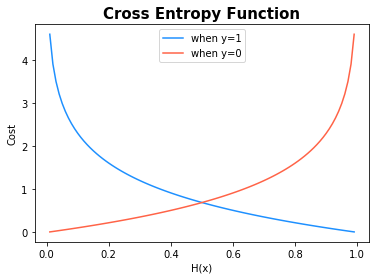

In [3]:
x = np.arange(0.01, 1, 0.01)
y1 = -np.log(x)
y0 = -np.log(1-x)

plt.title('Cross Entropy Function', size=15, weight='bold')
plt.plot(x, y1, color='dodgerblue', label='when y=1')
plt.plot(x, y0, color='tomato', label='when y=0')
plt.xlabel('H(x)')
plt.ylabel('Cost')
plt.legend(loc='upper center')
plt.show()

In [11]:
x

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("TensorFlow Version: %s" % (tf.__version__))

TensorFlow Version: 2.0.0


In [5]:
# Data for train
x_train = np.array([[1., 1.],
                   [1., 2.],
                   [2., 1.],
                   [3., 2.],
                   [3., 3.],
                   [2., 3.]],
                   dtype=np.float32)

y_train = np.array([[0.],
                   [0.],
                   [0.],
                   [1.],
                   [1.],
                   [1.]],
                   dtype=np.float32)

# Data for test
x_test = np.array([[3., 0.],
                   [4., 1.]],
                   dtype=np.float32)

y_test = np.array([[0.],
                   [1.]],
                   dtype=np.float32)

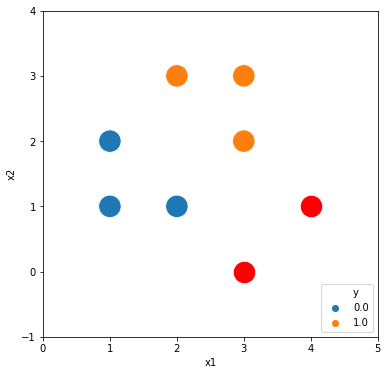

In [6]:
df = pd.DataFrame(x_train, columns=['x1','x2'])
df['y'] = y_train

df_test = pd.DataFrame(x_test, columns=['x1','x2'])
df_test['y'] = y_test

plt.figure(figsize=(6,6))
sns.scatterplot(x='x1', y='x2', hue='y', data=df, s=500)
sns.scatterplot(x='x1', y='x2', color='red', data=df_test, s=500)
plt.xlim(0, 5)
plt.ylim(-1, 4)
plt.legend(loc='lower right')
plt.show()

In [7]:
# Weights
tf.random.set_seed(2020)
W = tf.Variable(tf.random.normal([2, 1], mean=0.0))
b = tf.Variable(tf.random.normal([1], mean=0.0))

print('# Weights: \n', W.numpy(), '\n\n# Bias: \n', b.numpy())

# Weights: 
 [[-0.10099822]
 [ 0.6847899 ]] 

# Bias: 
 [0.38414612]


In [8]:
# Learning Rate
learning_rate = 0.01

# Hypothesis and Prediction Function
def predict(X):
    z = tf.matmul(X, W) + b
    hypothesis = 1 / (1 + tf.exp(-z))
    return hypothesis

# Training
for i in range(2000+1):

    with tf.GradientTape() as tape:

        hypothesis = predict(x_train)
        cost = tf.reduce_mean(-tf.reduce_sum(y_train*tf.math.log(hypothesis) + (1-y_train)*tf.math.log(1-hypothesis)))        
        W_grad, b_grad = tape.gradient(cost, [W, b])

        W.assign_sub(learning_rate * W_grad)
        b.assign_sub(learning_rate * b_grad)

    if i % 400 == 0:
        print(">>> #%s \n Weights: \n%s \n Bias: \n%s \n cost: %s\n" % (i, W.numpy(), b.numpy(), cost.numpy()))

>>> #0 
 Weights: 
[[-0.11992227]
 [ 0.66358066]] 
 Bias: 
[0.36538637] 
 cost: 4.759439

>>> #400 
 Weights: 
[[0.6189961]
 [0.7487087]] 
 Bias: 
[-2.3262432] 
 cost: 2.19401

>>> #800 
 Weights: 
[[1.0580252]
 [1.0836021]] 
 Bias: 
[-3.9347084] 
 cost: 1.4598235

>>> #1200 
 Weights: 
[[1.3448478]
 [1.3511041]] 
 Bias: 
[-5.073362] 
 cost: 1.0942489

>>> #1600 
 Weights: 
[[1.5625292]
 [1.5643579]] 
 Bias: 
[-5.953321] 
 cost: 0.8763466

>>> #2000 
 Weights: 
[[1.739508 ]
 [1.7401232]] 
 Bias: 
[-6.6709533] 
 cost: 0.73154



In [9]:
hypo = predict(x_test)
print("Prob: \n", hypo.numpy())
print("Result: \n", tf.cast(hypo > 0.5, dtype=tf.float32).numpy())

Prob: 
 [[0.18962799]
 [0.88362366]]
Result: 
 [[0.]
 [1.]]


In [10]:
def acc(hypo, label):
    predicted = tf.cast(hypo > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, label), dtype=tf.float32))
    return accuracy

accuracy = acc(predict(x_test), y_test).numpy()
print("Accuracy: %s" % accuracy)

Accuracy: 1.0
